In [187]:
import pandas as pd
from pathlib import Path

In [188]:
# Define path to Scorecard data
scorecard_dir = Path("../data/raw")
merged_files = sorted(scorecard_dir.glob("MERGED20*_PP.csv"))

In [189]:
# Display files detected
print("Found MERGED files:")
for f in merged_files:
    print(" -", f.name)

Found MERGED files:


In [190]:
# Dictionary to hold all crosswalk dataframes
scorecard_data = {}

In [191]:
# Output summary of each file to a text file
output_file = Path("../data/processed/scorecard_summaries.txt")
with open(output_file, "w", encoding="utf-8") as out:
    for file in merged_files:
        try:
            df = pd.read_csv(file, low_memory=False)
            out.write(f"\n{file.name} - Shape: {df.shape}\n")
            out.write("Columns:\n")
            out.write(", ".join(df.columns[:20]))  # First 20 columns
            out.write("\n\nHead:\n")
            out.write(df.head().to_string(index=False))
            out.write("\n" + "-"*80 + "\n")
        except Exception as e:
            out.write(f"Failed to load {file.name}: {e}\n")

print(f"Scorecard summaries written to: {output_file}")

Scorecard summaries written to: ../data/processed/scorecard_summaries.txt


In [192]:
# Merge all scorecard files into one dataframe
def merge_scorecard_files(file_list):
    merged_df = pd.DataFrame()
    for file in file_list:
        try:
            df = pd.read_csv(file, low_memory=False)
            year = file.stem.replace("MERGED", "").replace("_PP", "")
            df["Year"] = year
            merged_df = pd.concat([merged_df, df], ignore_index=True)
        except Exception as e:
            print(f"Failed to merge {file.name}: {e}")
    if "UNITID" in merged_df.columns:
        merged_df = merged_df.sort_values(by="UNITID").reset_index(drop=True)
    return merged_df


merged_scorecard = merge_scorecard_files(merged_files)
print(f"Merged dataset shape: {merged_scorecard.shape}")

# Saved the merged dataset into the processed directory
merged_scorecard.to_csv("../data/processed/merged_scorecard.csv", index=False)
print("Merged Scorecard dataset saved to: data/processed/merged_scorecard.csv")

Merged dataset shape: (0, 0)
Merged Scorecard dataset saved to: data/processed/merged_scorecard.csv


In [193]:
import matplotlib.pyplot as plt


In [194]:
import os

# Path to your CSV folder
csv_folder = "/Users/surgalsb/Downloads/College_Scorecard_Raw_Data_01162025/Merged"  # Update this to your actual path

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.CSV')]

# Print the list of files to verify
print(csv_files)



[]


In [195]:
import os

csv_folder = "/Users/surgalsb/Downloads/College_Scorecard_Raw_Data_01162025/Merged"  # Make sure this path is correct

# List the contents of the directory
print(os.listdir(csv_folder))


['MERGED2011_12_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2020_21_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2018_19_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2019_20_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2021_22_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2022_23_PP.csv', 'MERGED2010_11_PP.csv']


In [215]:
import pandas as pd
import os

# Path to your CSV folder
csv_folder = "/Users/surgalsb/Downloads/College_Scorecard_Raw_Data_01162025/Merged"  # Update this with your actual folder path

# List all CSV files in the folder
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

# Initialize a list to store DataFrames
df_list = []

# Loop through each file and load it
for file in csv_files:
    # Extract the year from the file name
    year = file.split('MERGED')[1].split('_')[0]  # Extracts "2011" from "MERGED2011_12"
    
    # Full file path
    file_path = os.path.join(csv_folder, file)
    
    # Load the CSV file
    try:
        df = pd.read_csv(file_path)
        
        # Add a new column 'Year' with the extracted year
        df['Year'] = int(year)  # Convert year to integer for easier plotting
        
        # Append the dataframe to the list
        df_list.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Check the length of the DataFrame list
print(f"Number of DataFrames loaded: {len(df_list)}")

# Combine all DataFrames into one
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    print(combined_df.head())  # Show first few rows to verify
else:
    print("No DataFrames to combine. Check if files are being loaded correctly.")


/var/folders/jr/5h9mm7fd3kx87zz17g2vwqc80000gp/T/ipykernel_43033/2630524108.py:23: DtypeWarning: Columns (1433,1447,1489,1501,1502,1537,1540,1542,1547,1553,1554,1559,1560,1606,1614,1615,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1658,1659,1693,1694,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/jr/5h9mm7fd3kx87zz17g2vwqc80000gp/T/ipykernel_43033/2630524108.py:23: DtypeWarning: Columns (1,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/jr/5h9mm7fd3kx87zz17g2vwqc80000gp/T/ipykernel_43033/2630524108.py:23: DtypeWarning: Columns (1,1407,1408,1411,1426,1431,1432,1433,1437,1438,1445,1446,1461,1465,1466,1473,1474,1475,1489,1537,1538,1539,1540,1541,1542,1606,1610,1611,1613,1614,1615,1616,1688,1689,1729,1909,1910,1911,191

Number of DataFrames loaded: 27
   UNITID    OPEID   OPEID6                               INSTNM        CITY  \
0  100654   100200   1002.0             Alabama A & M University      Normal   
1  100663   105200   1052.0  University of Alabama at Birmingham  Birmingham   
2  100690  2503400  25034.0                   Amridge University  Montgomery   
3  100706   105500   1055.0  University of Alabama in Huntsville  Huntsville   
4  100724   100500   1005.0             Alabama State University  Montgomery   

  STABBR         ZIP ACCREDAGENCY INSTURL NPCURL  ...  COUNT_WNE_MALE1_P11  \
0     AL       35762          NaN     NaN    NaN  ...                  NaN   
1     AL  35294-0110          NaN     NaN    NaN  ...                  NaN   
2     AL  36117-3553          NaN     NaN    NaN  ...                  NaN   
3     AL       35899          NaN     NaN    NaN  ...                  NaN   
4     AL  36104-0271          NaN     NaN    NaN  ...                  NaN   

   GT_THRESHOLD_P1

In [216]:
# Check the column names
print(combined_df.columns)


Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'COUNT_WNE_MALE1_P11', 'GT_THRESHOLD_P11', 'MD_EARN_WNE_INC1_P11',
       'MD_EARN_WNE_INC2_P11', 'MD_EARN_WNE_INC3_P11',
       'MD_EARN_WNE_INDEP0_P11', 'MD_EARN_WNE_INDEP1_P11',
       'MD_EARN_WNE_MALE0_P11', 'MD_EARN_WNE_MALE1_P11', 'Year'],
      dtype='object', length=3306)


In [217]:
# Check if 'Year' and 'TUITIONFEE_IN' columns are available and clean
print(combined_df[['Year', 'TUITIONFEE_OUT']].head())


   Year  TUITIONFEE_OUT
0  2011         12156.0
1  2011         14256.0
2  2011          8720.0
3  2011         19424.0
4  2011         14394.0


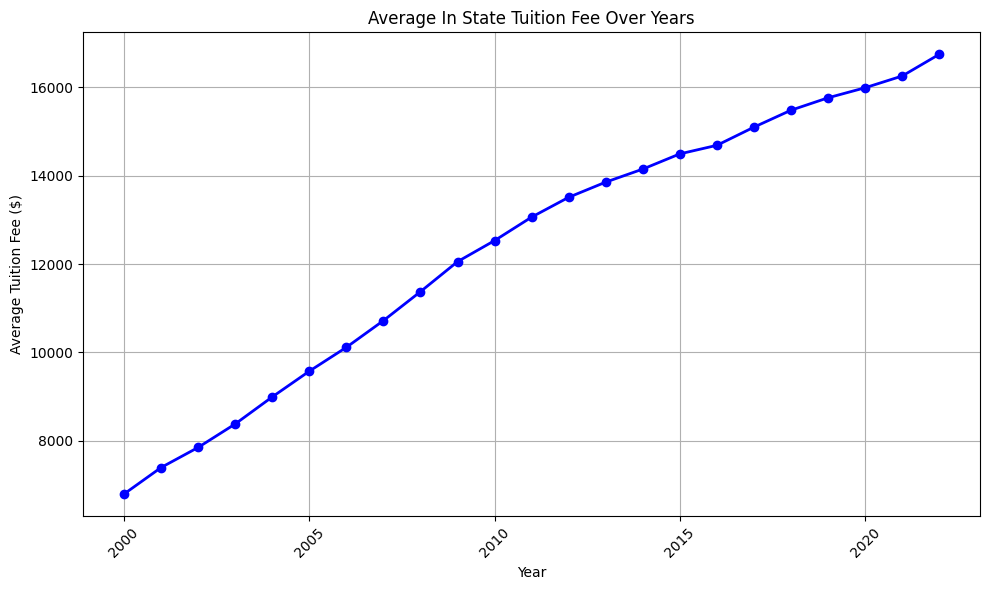

In [218]:
import matplotlib.pyplot as plt

# Group by 'Year' and calculate the mean tuition for each year
tuition_by_year = combined_df.groupby('Year')['TUITIONFEE_IN'].mean()

# Plotting
plt.figure(figsize=(10, 6))
tuition_by_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title("Average In State Tuition Fee Over Years")
plt.xlabel("Year")
plt.ylabel("Average Tuition Fee ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

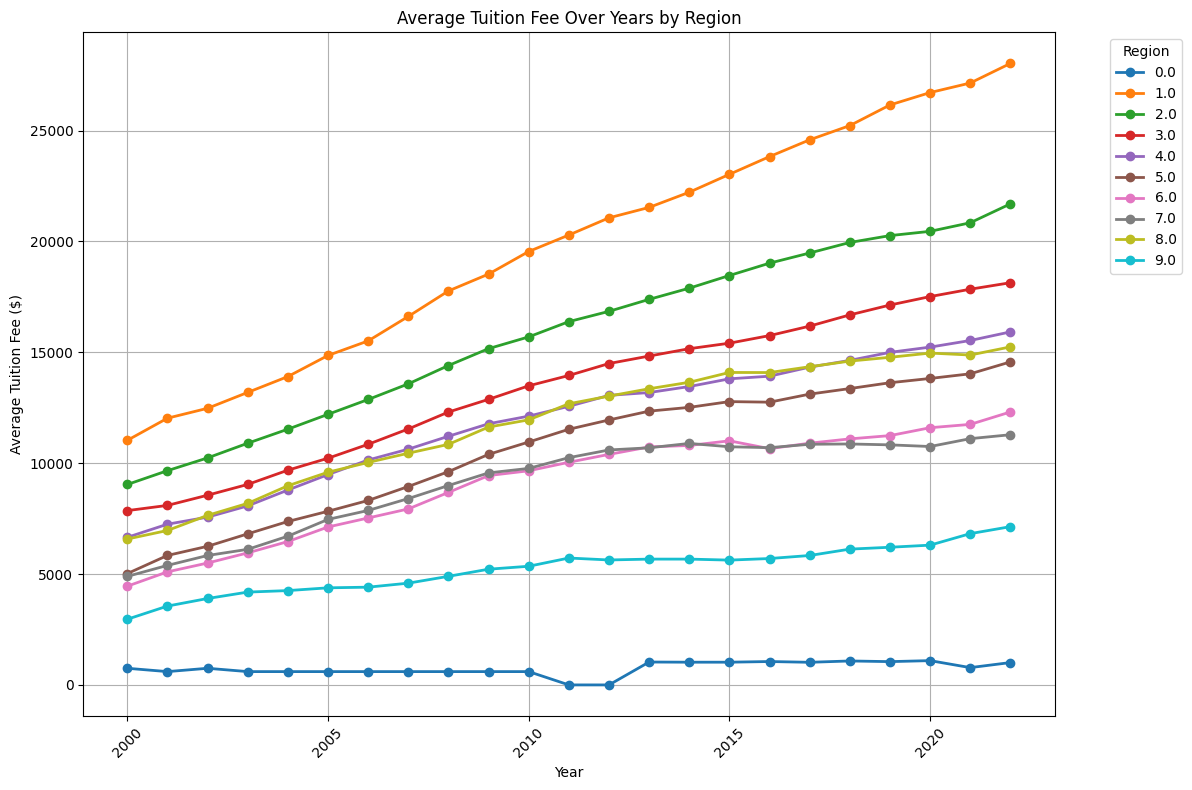

In [219]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Region', then calculate the mean tuition for each group
tuition_by_year_region = combined_df.groupby(['Year', 'REGION'])['TUITIONFEE_IN'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each region with a different color
tuition_by_year_region.plot(kind='line', marker='o', linestyle='-', linewidth=2, figsize=(12, 8))

plt.title("Average Tuition Fee Over Years by Region")
plt.xlabel("Year")
plt.ylabel("Average Tuition Fee ($)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [220]:
# Get unique regions
regions = combined_df['REGION'].unique()

# Display the unique regions and their count
print("Unique Regions:", regions)
print("Number of Regions:", len(regions))


Unique Regions: [ 5.  3.  8.  6.  0.  4.  7.  1.  2.  9. nan]
Number of Regions: 11


<Figure size 1200x800 with 0 Axes>

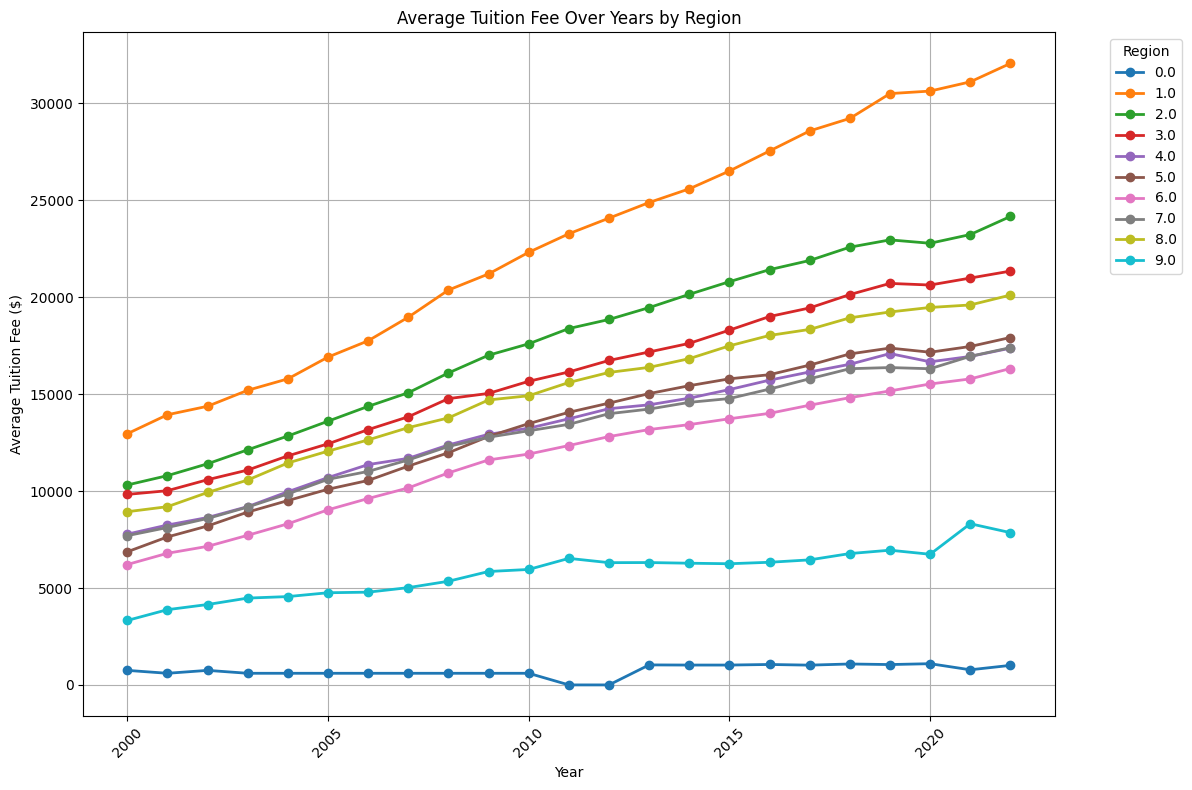

In [221]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Region', then calculate the mean tuition for each group
tuition_by_year_region = combined_df.groupby(['Year', 'REGION'])['TUITIONFEE_OUT'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each region with a different color
tuition_by_year_region.plot(kind='line', marker='o', linestyle='-', linewidth=2, figsize=(12, 8))

plt.title("Average Tuition Fee Over Years by Region")
plt.xlabel("Year")
plt.ylabel("Average Tuition Fee ($)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

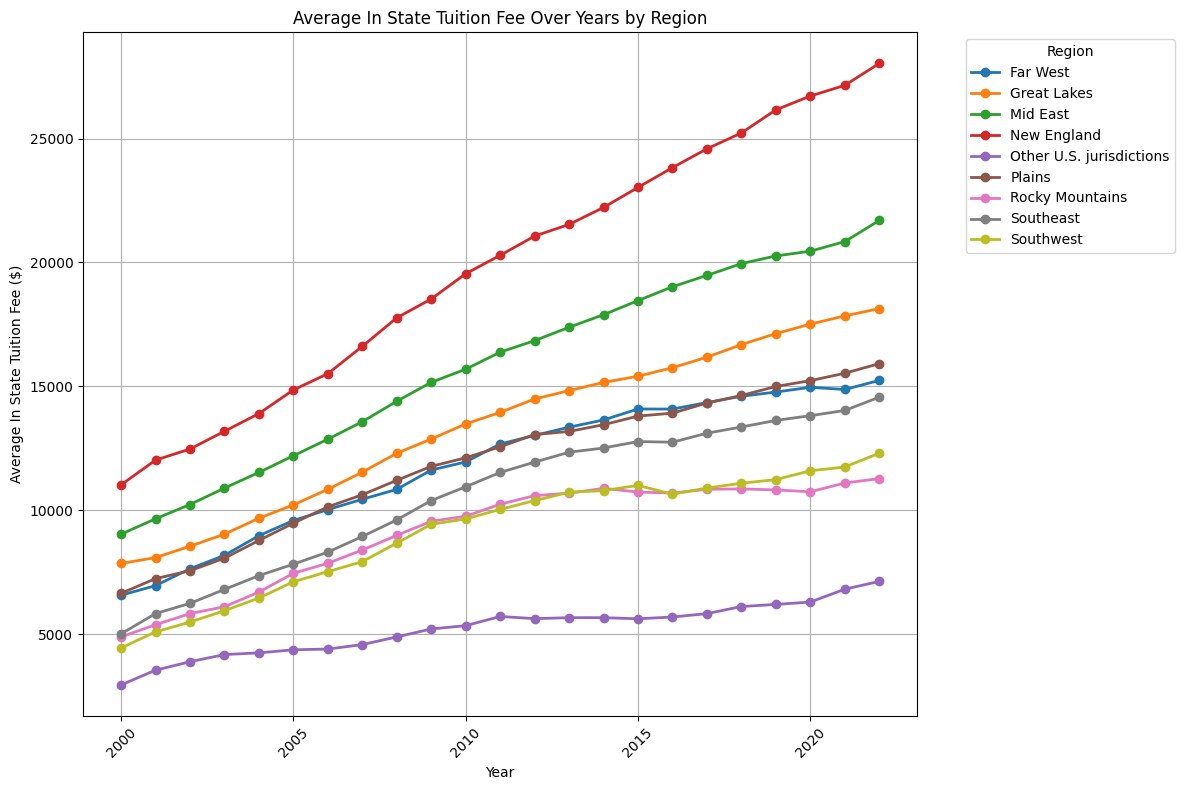

In [222]:
import matplotlib.pyplot as plt

# Create a dictionary that maps the REGION numeric values to region names
region_mapping = {
    1.0: "New England",
    2.0: "Mid East",
    3.0: "Great Lakes",
    4.0: "Plains",
    5.0: "Southeast",
    6.0: "Southwest",
    7.0: "Rocky Mountains",
    8.0: "Far West",
    9.0: "Other U.S. jurisdictions",
    10.0: "U.S. service academies"
}

# Replace the REGION numeric values with the actual region names
combined_df['REGION'] = combined_df['REGION'].map(region_mapping)

# Group by 'Year' and 'REGION', then calculate the mean tuition for each group
tuition_by_year_region = combined_df.groupby(['Year', 'REGION'])['TUITIONFEE_IN'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each region with a different color
tuition_by_year_region.plot(kind='line', marker='o', linestyle='-', linewidth=2, figsize=(12, 8))

# Add labels and title
plt.title("Average In State Tuition Fee Over Years by Region")
plt.xlabel("Year")
plt.ylabel("Average In State Tuition Fee ($)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
